<a href="https://colab.research.google.com/github/Prisci723/ia2/blob/main/Laboratorio1/Laboratorio1ia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Solo mis plantas/Aloe Vera.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
with zipfile.ZipFile('/content/drive/MyDrive/Solo mis plantas/Cedron.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
with zipfile.ZipFile('/content/drive/MyDrive/Solo mis plantas/Higuera.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
with zipfile.ZipFile('/content/drive/MyDrive/Solo mis plantas/Nispero.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
with zipfile.ZipFile('/content/drive/MyDrive/Solo mis plantas/floripondio.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
import os

# Definir las clases
classes = ['Aloe Vera', 'Cedron', 'Higuera', 'Nispero' , 'floripondio']


# Listas para almacenar rutas de imágenes y sus etiquetas
imgs = []
labels = []

# Iterar sobre las clases
for i, lab in enumerate(classes):
    # Definir el path de la carpeta de la clase actual
    class_path = os.path.join(lab)

    # Verificar si el directorio existe
    if not os.path.isdir(class_path):
        print(f'La carpeta {class_path} no existe.')
        continue

    # Listar todos los archivos en el directorio de la clase
    paths = os.listdir(class_path)

    # Filtrar solo los archivos que terminan en .jpg
    paths = [p for p in paths if p.endswith('.jpg')]

    print(f'Categoría: {lab}. Imágenes: {len(paths)}')

    # Construir las rutas completas de las imágenes y etiquetas
    imgs += [os.path.join(class_path, img) for img in paths]
    labels += [i] * len(paths)

# Ahora imgs contiene las rutas completas de las imágenes y labels contiene las etiquetas correspondientes


Categoría: Aloe Vera. Imágenes: 15106
Categoría: Cedron. Imágenes: 15777
Categoría: Higuera. Imágenes: 15062
Categoría: Nispero. Imágenes: 16154
Categoría: floripondio. Imágenes: 14024


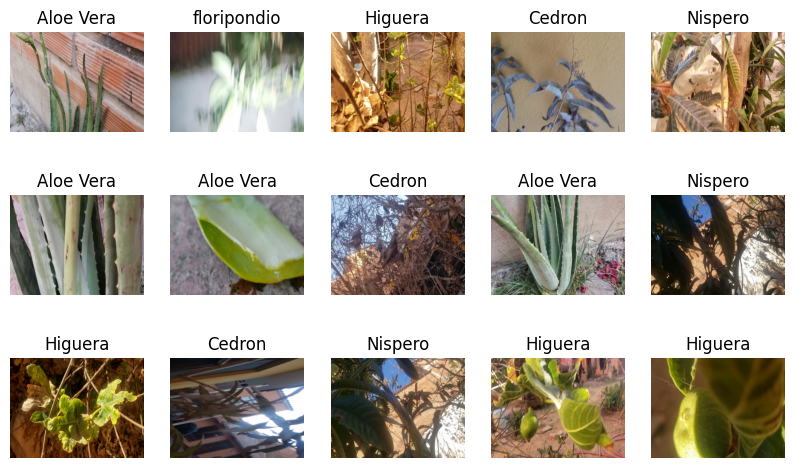

In [ ]:
import random
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [ ]:
!pip install pillow


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming your images and labels are stored in arrays
# images is your array of image data, labels is the corresponding labels
images = np.array(imgs)  # Convert to NumPy arrays if necessary
labels = np.array(labels)

In [ ]:
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 60898
Test set size: 15225


In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from skimage import io
import albumentations as A

class Dataset:
    def __init__(self, X, y, trans):
        self.X = X
        self.y = y
        self.trans = trans

    def __len__(self):
        return len(self.X)

    def __getitem__(self, ix):
        # Load the image
        img = io.imread(self.X[ix])
        # Apply transformations
        if self.trans:
            img = self.trans(image=img)["image"]
        # Convert the image and label to JAX's jnp array
        img = jnp.array(img / 255., dtype=jnp.float32).transpose(2, 0, 1)
        label = jnp.array(self.y[ix], dtype=jnp.int32)
        return img, label

trans = A.Compose([
    A.Resize(50, 50)
])

# Create dataset dictionaries
dataset = {
    'train': Dataset(X_train, y_train, trans),
    'test': Dataset(X_test, y_test, trans)
}

# Check the dataset lengths
len(dataset['train']), len(dataset['test'])


(60898, 15225)

In [ ]:
dataset['train'][2]

(Array([[[0.6       , 0.5254902 , 0.5019608 , ..., 0.57254905,
          0.5647059 , 0.2509804 ],
         [0.5529412 , 0.49019608, 0.5058824 , ..., 0.5882353 ,
          0.5647059 , 0.5294118 ],
         [0.5294118 , 0.50980395, 0.5686275 , ..., 0.6156863 ,
          0.5568628 , 0.5921569 ],
         ...,
         [0.5294118 , 0.47058824, 0.46666667, ..., 0.41568628,
          0.32941177, 0.2901961 ],
         [0.5372549 , 0.5058824 , 0.49019608, ..., 0.49411765,
          0.43529412, 0.2901961 ],
         [0.52156866, 0.49019608, 0.45882353, ..., 0.4745098 ,
          0.3647059 , 0.39607844]],
 
        [[0.5686275 , 0.49411765, 0.45882353, ..., 0.5647059 ,
          0.54901963, 0.23137255],
         [0.5411765 , 0.4627451 , 0.4627451 , ..., 0.57254905,
          0.54901963, 0.5137255 ],
         [0.5137255 , 0.47843137, 0.5294118 , ..., 0.5921569 ,
          0.5294118 , 0.5686275 ],
         ...,
         [0.5176471 , 0.4745098 , 0.4627451 , ..., 0.4117647 ,
          0.30588236, 0.

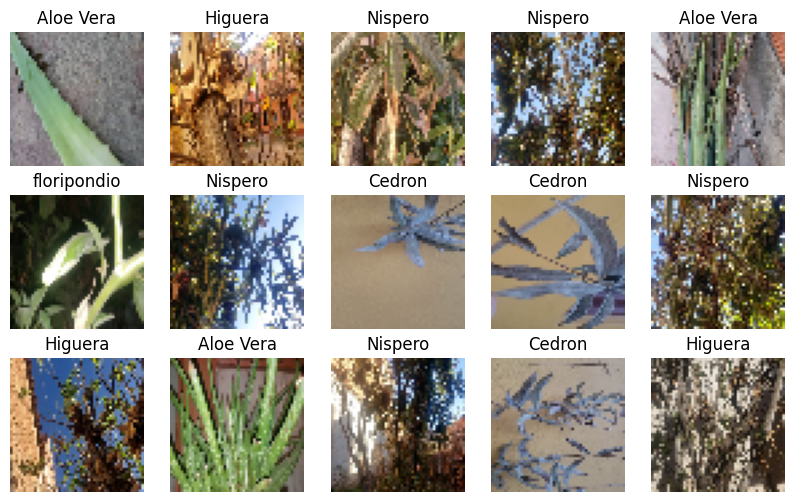

In [ ]:
import matplotlib.pyplot as plt
import random

# Mostrar imágenes de entrenamiento
fig, axs = plt.subplots(3, 5, figsize=(10, 6))
for _ax in axs:
    for ax in _ax:
        ix = random.randint(0, len(dataset['train']) - 1)
        img, lab = dataset['train'][ix]
        # Cambiamos el orden de los ejes de (C, H, W) a (H, W, C) para mostrar la imagen correctamente
        ax.imshow(np.array(img.transpose(1, 2, 0)))  # Convierte a NumPy para compatibilidad con matplotlib
        ax.axis('off')
        ax.set_title(classes[lab])

plt.show()


# FRAMEWORK: JAX

Jax está basado en numpy, y tiene la ventaja de tener autograd, que permite agilizar las tareas de deep learning.

**Aspectos relevantes de JAX**
* Permite el soporte para GPU/TPU
* La funcion jax.jit() es la que se encarga de procesarla tanto en CPU, GPU o TPU
* jax.vmap() permite vectorizar operaciones, lo que hace que se puedan aplicar funciones sobre loops, sin tener que escribir loops explícitamente
* JAX permite la ejecución en paralelo para múltiples dispositivos
* También viene incluido con la librería FLAX la cual permite crear modelos para redes neuronales, entrenarlos, lidiar con gradientes mientras que permite trabajar con la optimización de JAX.


In [ ]:
!pip install jax jaxlib flax


## Creamos el modelo con JAX

Se utiliza para definir las capas de la red de manera más concisa @nn.compact.

* __call__: define las capas del modelo, lo perimero que hace es aplanar las imagenes, 7500 paramétros por cada imagen. Los parámetros serán enviados a una capa densa con 128 neuronas, después la segunda capa que también es densa, es decir totalmente conectada, con 64 neuronas. Por último la última capa que corresponde a una clasificación de los 5 tipos de imágenes

* create_train_state: Inicializa el modelo con un tipo de entrada para que de alguna forma conozca el tipo de entradas, el optimizador adam es cargado desde JAX y puede ser utilizado por FLAX

* compute_loss: utilizando la funcion de JAX permite que la etiqueta predecida sea marcada como 1 y las demás como 0, esto lo hace utilizando one_hot_labels
* compute_accuracy: Calcula cuanto se está desviando el valor del predicho respecto al valor original
* @jax.jit significa que se utilizará las optimizacion para las operaciones matemáticas que contiene JAX
* train_step: es practicamente donde se realizará el entrenamiento, las imágenes son cargadas en un bache definido, se hace el proceso de forward y backward
* eval_step: permite evaluar como se irá comportando el modelo, pero sin actualizar los gradientes
* create_train_state:  se utiliza para inicializar el estado de entrenamiento del modelo, que incluye los parámetros del modelo y el optimizador
* train_epoch: Incializa como se aplicarán todas las funciones definidas anteriormente, los índices para los pesos son inicializados aleatoriamente
* evaluate_model: Evalúa el modelo con los pesos entrenados dentro del entrenamiento


In [ ]:
import jax
import jax.numpy as jnp
from flax import linen as nn
from flax.training import train_state
import optax
import numpy as np

# Define the model with 2 hidden layers
class SimpleMLP(nn.Module):
    num_classes: int = 5  # Number of classes (5 in your case)

    @nn.compact
    def __call__(self, x):
        # Flatten the image input from (50, 50, 3) to a single vector
        x = x.reshape((x.shape[0], -1))  # Flatten to (batch_size, 50*50*3)

        # First hidden layer with 128 units
        x = nn.Dense(features=128)(x)
        x = nn.relu(x)

        # Second hidden layer with 64 units
        x = nn.Dense(features=64)(x)
        x = nn.relu(x)

        # Output layer for 5 classes
        x = nn.Dense(features=self.num_classes)(x)
        return x

# Initialize optimizer and training state
def create_train_state(rng, model, learning_rate):
    params = model.init(rng, jnp.ones([1, 50, 50, 3]))['params']  # Initialize with input shape [1, 50, 50, 3]
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)

# Define the loss function (cross entropy)
def compute_loss(logits, labels):
    one_hot_labels = jax.nn.one_hot(labels, num_classes=5)
    loss = optax.softmax_cross_entropy(logits, one_hot_labels).mean()
    return loss

# Define accuracy calculation
def compute_accuracy(logits, labels):
    predictions = jnp.argmax(logits, axis=-1)
    accuracy = jnp.mean(predictions == labels)
    return accuracy

# Define the training step
@jax.jit
def train_step(state, batch):
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, batch['images'])
        loss = compute_loss(logits, batch['labels'])
        return loss, logits

    grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
    (loss, logits), grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    accuracy = compute_accuracy(logits, batch['labels'])
    return state, loss, accuracy

# Define the evaluation step
@jax.jit
def eval_step(state, batch):
    logits = state.apply_fn({'params': state.params}, batch['images'])
    loss = compute_loss(logits, batch['labels'])
    accuracy = compute_accuracy(logits, batch['labels'])
    return loss, accuracy

# Create the training state
rng = jax.random.PRNGKey(0)
model = SimpleMLP(num_classes=5)
state = create_train_state(rng, model, learning_rate=0.001)

# Training loop
def train_epoch(state, dataset, batch_size):
    # Shuffle the dataset
    indices = np.random.permutation(len(dataset['train']))
    train_images = np.array([dataset['train'][i][0] for i in indices])
    train_labels = np.array([dataset['train'][i][1] for i in indices])

    # Store metrics
    train_loss, train_accuracy = 0.0, 0.0
    num_batches = 0

    for start_idx in range(0, len(dataset['train']), batch_size):
        end_idx = start_idx + batch_size
        batch_images = train_images[start_idx:end_idx]
        batch_labels = train_labels[start_idx:end_idx]

        batch = {'images': jnp.array(batch_images), 'labels': jnp.array(batch_labels)}
        state, loss, accuracy = train_step(state, batch)

        train_loss += loss
        train_accuracy += accuracy
        num_batches += 1

    # Average loss and accuracy over the epoch
    train_loss /= num_batches
    train_accuracy /= num_batches

    return state, train_loss, train_accuracy

def evaluate_model(state, dataset, batch_size):
    test_images = np.array([dataset['test'][i][0] for i in range(len(dataset['test']))])
    test_labels = np.array([dataset['test'][i][1] for i in range(len(dataset['test']))])

    # Store metrics
    test_loss, test_accuracy = 0.0, 0.0
    num_batches = 0

    for start_idx in range(0, len(dataset['test']), batch_size):
        end_idx = start_idx + batch_size
        batch_images = test_images[start_idx:end_idx]
        batch_labels = test_labels[start_idx:end_idx]

        batch = {'images': jnp.array(batch_images), 'labels': jnp.array(batch_labels)}
        loss, accuracy = eval_step(state, batch)

        test_loss += loss
        test_accuracy += accuracy
        num_batches += 1

    # Average loss and accuracy over the test set
    test_loss /= num_batches
    test_accuracy /= num_batches

    return test_loss, test_accuracy


El codigo que definimos anteriormente es ejecutado y podemos ver el resultado del entrenamiento

In [ ]:

# Assuming 8 epochs and a batch size of 100
num_epochs = 8
batch_size = 100
for epoch in range(num_epochs):
    # Train for one epoch
    state, train_loss, train_accuracy = train_epoch(state, dataset, batch_size)
    # Evaluate the model
    test_loss, test_accuracy = evaluate_model(state, dataset, batch_size)

    # Print the metrics for this epoch
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


Epoch 1/8
Train loss: 0.9107, Train accuracy: 0.6461
Test loss: 0.7174, Test accuracy: 0.7256
Epoch 2/8
Train loss: 0.6038, Train accuracy: 0.7766
Test loss: 0.5500, Test accuracy: 0.7971
Epoch 3/8
Train loss: 0.4799, Train accuracy: 0.8274
Test loss: 0.5027, Test accuracy: 0.8159
Epoch 4/8
Train loss: 0.4016, Train accuracy: 0.8575
Test loss: 0.3916, Test accuracy: 0.8608
Epoch 5/8
Train loss: 0.3517, Train accuracy: 0.8760
Test loss: 0.3659, Test accuracy: 0.8771
Epoch 6/8
Train loss: 0.3041, Train accuracy: 0.8947
Test loss: 0.3325, Test accuracy: 0.8885
Epoch 7/8
Train loss: 0.2765, Train accuracy: 0.9044
Test loss: 0.3337, Test accuracy: 0.8842
Epoch 8/8
Train loss: 0.2477, Train accuracy: 0.9144
Test loss: 0.4169, Test accuracy: 0.8646
